In [1]:
import matplotlib.pyplot as plt
import numpy as np

import lsst.daf.butler as dB
import lsst.cp.verify.notebooks.utils as utils
import lsst.afw.display as afwDisplay

In [14]:
# Which calibration type to analyse.
calibType = 'bias'

# This cell should be edited to match the data to be inspected.
afwDisplay.setDefaultBackend("astrowidgets")
cameraName = 'LATISS'
verifyCollection = 'u/czw/DM-28920/verifyBias.20210702a'
# verifyCollection = 'u/czw/DM-28920/verifyBias.20210721a'

In [15]:
# Get butler and camera
butler = dB.Butler("/repo/main/", collections=[verifyCollection, 'u/czw/DM-28920/calib.20210720'])
camera = butler.get('camera', instrument=cameraName)

In [16]:
# Get Run Statistics
runStats = butler.get('verifyBiasStats', instrument=cameraName)
runSuccess = runStats.pop('SUCCESS')

In [9]:
# IW = astrowidgets.ImageWidget(image_width=1000, image_height=1000)
display = afwDisplay.Display(dims=(1000, 1000))
display.embed()

ImageWidget(children=(Image(value=b'', format='jpeg', height='1000', layout="Layout(margin='0')", width='1000'…

In [10]:
calib = butler.get(calibType, instrument=cameraName, detector=0)
calibArray = bias.getImage().getArray()

# Get simple stats
q25, q50, q75 = np.percentile(calibArray.flatten(), [25, 50, 75])
sigma = 0.74 * (q75 - q25)
print(f"Median: {q50}   Stdev: {sigma}")

display.mtv(calib)
display._scale('linear', (q50 - 3.0 * sigma), (q50 + 3.0* sigma), "")

LookupError: Dataset bias with data ID {instrument: 'LATISS', detector: 0} could not be found in collections [u/czw/DM-28920/verifyBias.20210721a, u/czw/DM-28920/calib.20210720].

In [11]:
# This block allows the residual images to be scanned for concerns.
blinkResiduals = True
if blinkResiduals:
    continueDisplay = True
    skipNumber = 0
    for exposureId, stats in runStats.items():
        if skipNumber > 0:
            skipNumber -= 1
            continue
        
        # TODO: support multi-detector
        detId = 0
        residual = butler.get('cpBiasProc', instrument=cameraName, exposure=exposureId, detector=detId)
        detStats = butler.get('verifyBiasDetStats', instrument=cameraName, exposure=exposureId, detector=detId)

        display.mtv(residual)    
        continueDisplay, skipNumber = utils.interactiveBlock(f"{exposureId} {detId}", detStats)
        if continueDisplay is False:
            break

LookupError: Dataset cpBiasProc with data ID {instrument: 'LATISS', detector: 0, exposure: 2021012000020} could not be found in collections [u/czw/DM-28920/verifyBias.20210721a, u/czw/DM-28920/calib.20210720].

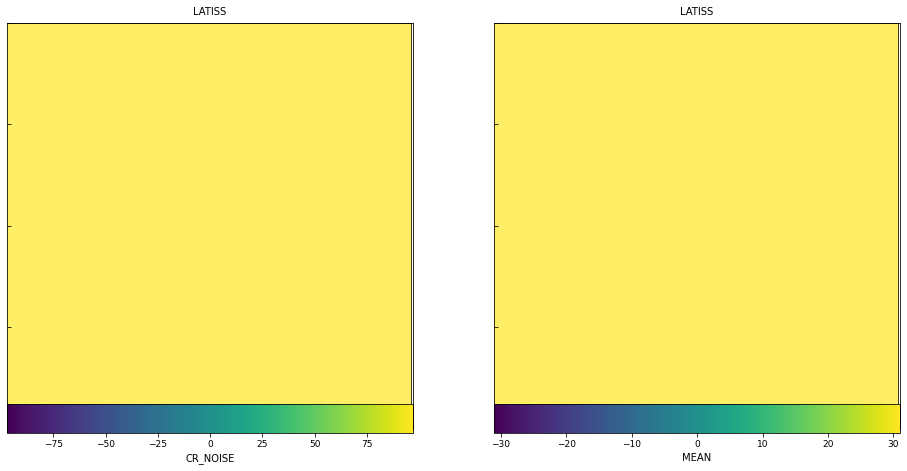

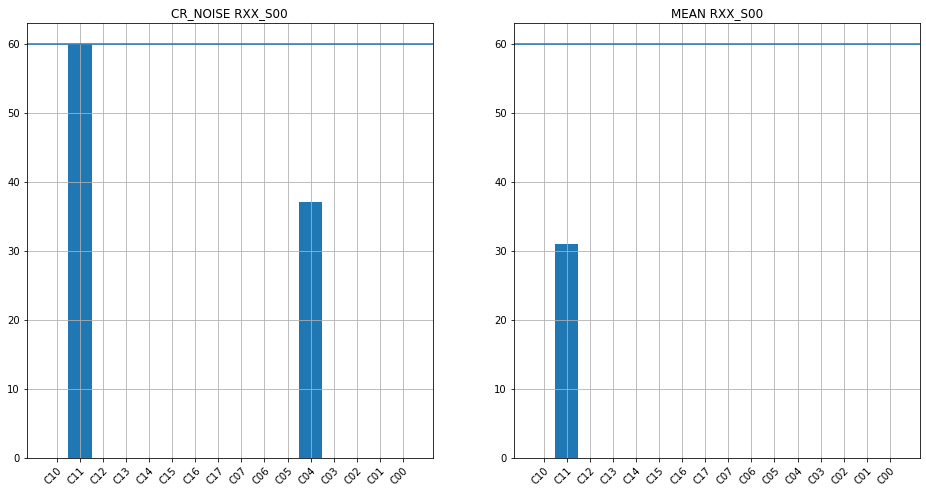

In [17]:
utils.plotFailures(runStats, camera, scaleFactor=8)

In [20]:
config = butler.get('isr_config')
config.toDict()

{'saveMetadata': True,
 'datasetType': 'raw',
 'fallbackFilterName': None,
 'useFallbackDate': False,
 'expectWcs': True,
 'fwhm': 1.0,
 'qa': {'saveStats': True,
  'flatness': {'meshX': 256,
   'meshY': 256,
   'doClip': True,
   'clipSigma': 3.0,
   'nIter': 3},
  'doWriteOss': False,
  'doThumbnailOss': False,
  'doWriteFlattened': False,
  'doThumbnailFlattened': False,
  'thumbnailBinning': 4,
  'thumbnailStdev': 3.0,
  'thumbnailRange': 5.0,
  'thumbnailQ': 20.0,
  'thumbnailSatBorder': 2},
 'doConvertIntToFloat': True,
 'doSaturation': True,
 'saturatedMaskName': 'SAT',
 'saturation': nan,
 'growSaturationFootprintSize': 1,
 'doSuspect': False,
 'suspectMaskName': 'SUSPECT',
 'numEdgeSuspect': 0,
 'edgeMaskLevel': 'DETECTOR',
 'doSetBadRegions': True,
 'badStatistic': 'MEANCLIP',
 'doOverscan': True,
 'overscan': {'fitType': 'MEDIAN_PER_ROW',
  'order': 1,
  'numSigmaClip': 3.0,
  'maskPlanes': ['SAT'],
  'overscanIsInt': True},
 'overscanFitType': 'MEDIAN',
 'overscanOrder': 1,

In [12]:
runStats

{2021012000020: {'FAILURES': ['RXX_S00 C11 CR_NOISE']},
 2021012000032: {'FAILURES': ['RXX_S00 C11 CR_NOISE']},
 2021012000037: {'FAILURES': ['RXX_S00 C11 CR_NOISE']},
 2021012000055: {'FAILURES': ['RXX_S00 C11 CR_NOISE', 'RXX_S00 C11 MEAN']},
 2021012000059: {'FAILURES': ['RXX_S00 C11 CR_NOISE']},
 2021012000061: {'FAILURES': ['RXX_S00 C11 CR_NOISE']},
 2021012000063: {'FAILURES': ['RXX_S00 C11 CR_NOISE']},
 2021012700032: {'FAILURES': ['RXX_S00 C11 CR_NOISE', 'RXX_S00 C11 MEAN']},
 2021012700037: {'FAILURES': ['RXX_S00 C11 CR_NOISE', 'RXX_S00 C11 MEAN']},
 2021012700038: {'FAILURES': ['RXX_S00 C11 CR_NOISE', 'RXX_S00 C11 MEAN']},
 2021012700052: {'FAILURES': ['RXX_S00 C11 CR_NOISE', 'RXX_S00 C11 MEAN']},
 2021012700061: {'FAILURES': ['RXX_S00 C11 CR_NOISE', 'RXX_S00 C11 MEAN']},
 2021012700119: {'FAILURES': ['RXX_S00 C11 CR_NOISE', 'RXX_S00 C11 MEAN']},
 2021012700423: {'FAILURES': ['RXX_S00 C11 CR_NOISE', 'RXX_S00 C11 MEAN']},
 2021012700701: {'FAILURES': ['RXX_S00 C11 CR_NOISE', 'R

In [15]:
len(runStats)

60